# K-means

# [目的]<br>K-meansになれる

## import

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

[データセット]\
2014年のデータ二人以上の世帯３か月平均\
９月１日から11月30日までの３か月間

In [2]:
# データセットを読み込み
df = pd.read_csv("data/Household.csv", encoding = "shift-jis")
Pref = df.iloc[:,0]
Data = df.iloc[:,1:]

In [3]:
Pref.head()

0    北海道
1    青森県
2    岩手県
3    宮城県
4    秋田県
Name: Pref, dtype: object

In [4]:
Data.head()

,food,housing,utilities,medical,communication,education
0,64968,18060,22031,11595,42764,8422
1,62107,13657,25018,11145,39585,6839
2,67455,16232,24239,12195,52568,8288
3,70228,14673,23578,12777,51896,10863
4,67404,12437,25468,10770,44346,6224


(1) 食料\
　　　　穀類，魚介類，肉類，乳卵類，野菜・海藻，果物，油脂・調味料，菓子類，調理食品，飲料，酒類，外食\
(2) 住居\
　　　　家賃地代，設備修繕・維持（住宅の増改築費は含まれない。）\
(3) 光熱・水道\
　　　　電気代，ガス代，他の光熱，上下水道料\
(4) 保健医療\
　　　　医薬品，健康保持用摂取品，保健医療用品・器具，保健医療サービス（理・美容費は含まれない。）\
(5) 交通・通信\
　　　　交通，自動車等関係費，通信\
(6) 教育\
　　　　授業料等，教科書・学習参考教材，補習教育\

In [5]:
Data.describe()

,food,housing,utilities,medical,communication,education
count,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000
mean,69632.978723,15441.212766,21396.680851,12433.872340,46009.595745,11080.595745
std,4964.988439,3295.188857,2169.540305,1122.736808,4311.962076,3679.293905
min,59249.000000,10049.000000,17944.000000,9686.000000,35533.000000,4876.000000
25%,66337.500000,13053.500000,19824.000000,11601.000000,43290.500000,8358.500000
50%,69237.000000,15324.000000,21076.000000,12481.000000,46366.000000,10190.000000
75%,73984.500000,17280.500000,22386.500000,13156.500000,47872.500000,13348.000000
max,81418.000000,28610.000000,28526.000000,14647.000000,59189.000000,18962.000000


In [6]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   food           47 non-null     int64
 1   housing        47 non-null     int64
 2   utilities      47 non-null     int64
 3   medical        47 non-null     int64
 4   communication  47 non-null     int64
 5   education      47 non-null     int64
dtypes: int64(6)
memory usage: 2.3 KB


## 適当にK-meansによる分類

In [7]:
# クラスタ分析を実行
num_clus =  3 # クラスタ数を設定
pred = KMeans(n_clusters=num_clus, random_state=0).fit_predict(Data)
pred

array([0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 0, 2, 2, 2,
       1, 2, 1, 1, 1, 1, 1, 0, 0, 2, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0])

## クラスタ情報を追加

In [8]:
# Pandasのデータフレームにクラスタ番号を追加
df['cluster_id']=pred
print(df['cluster_id'].value_counts())
df.head()

2    19
0    18
1    10
Name: cluster_id, dtype: int64


,Pref,food,housing,utilities,medical,communication,education,cluster_id
0,北海道,64968,18060,22031,11595,42764,8422,0
1,青森県,62107,13657,25018,11145,39585,6839,0
2,岩手県,67455,16232,24239,12195,52568,8288,2
3,宮城県,70228,14673,23578,12777,51896,10863,2
4,秋田県,67404,12437,25468,10770,44346,6224,0


In [9]:
ID = df.groupby("cluster_id").mean()
ID

,food,housing,utilities,medical,communication,education
cluster_id,,,,,,
0,64744.222222,14794.222222,20335.666667,11681.888889,42974.666667,8628.277778
1,75420.400000,18415.600000,20669.500000,13256.000000,44630.000000,16862.100000
2,71218.421053,14488.684211,22784.578947,12713.578947,49610.894737,10360.947368


2    19
0    18
1    10
Name: cluster_id, dtype: int64


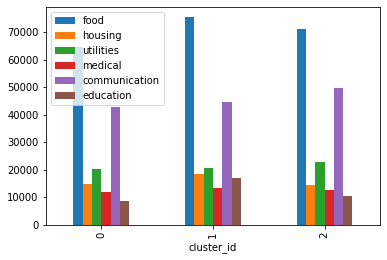

In [10]:
ID[0:].plot(kind='bar')
print(df['cluster_id'].value_counts())

全体: やはり食費にお金がかかっている\
0: 全体的に他のクラスタよりかけているお金は少ない\
1: 他のクラスタに比べて、食費、住宅費、医療費、教育費にお金をかけている\
2: 他のクラスタに比べて、光熱・水道費、交通費にお金をかけている

2    19
0    18
1    10
Name: cluster_id, dtype: int64


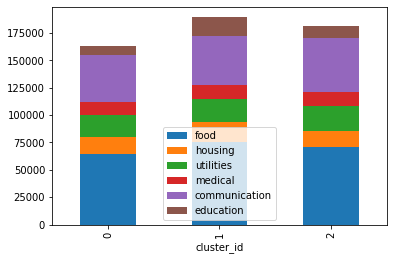

In [11]:
ID[0:].plot(kind='bar',stacked='true')
print(df['cluster_id'].value_counts())

0:  1の次に高い、かつ交通費にお金がかかる→都会から少し離れたところ\
1:　合計すると、最も費用がかかっている地域→都会!?\
2:  最も金額が少ない、かつ食費が安い→都会から離れた場所、地元で働くような場所

In [12]:
print(df[df["cluster_id"] == 0].shape)
df[df["cluster_id"] == 0]

(18, 8)


,Pref,food,housing,utilities,medical,communication,education,cluster_id
0,北海道,64968,18060,22031,11595,42764,8422,0
1,青森県,62107,13657,25018,11145,39585,6839,0
4,秋田県,67404,12437,25468,10770,44346,6224,0
18,山梨県,66448,14028,20565,11891,44735,11827,0
29,和歌山県,67256,10049,19475,9686,43337,8295,0
30,鳥取県,67696,12559,21114,12311,46807,6858,0
34,山口県,67598,15852,18880,12532,43439,7667,0
35,徳島県,67172,15064,20756,11396,46627,9775,0
37,愛媛県,66227,13935,19835,11524,39758,11684,0
38,高知県,66144,16789,18644,11375,40632,7816,0


九州は全部こっち\
四国も香川以外ある\
西の地区が多い\
9~11月ということもあり、西の人は暑さに強い!?北海道とかも涼しいから光熱費がかからないのかも!?

In [13]:
print(df[df["cluster_id"] == 1].shape)
df[df["cluster_id"] == 1]

(10, 8)


,Pref,food,housing,utilities,medical,communication,education,cluster_id
10,埼玉県,74515,17261,20339,13356,45395,17525,1
11,千葉県,75420,18064,20347,13914,45381,16518,1
12,東京都,81418,28610,20562,14414,40859,18962,1
13,神奈川県,78362,20209,20583,14213,46982,16373,1
22,愛知県,74673,19782,20868,13028,46813,16608,1
24,滋賀県,74655,13534,21837,13019,46371,17157,1
25,京都府,75595,13785,21197,11190,45121,17874,1
26,大阪府,73843,17270,19572,13035,38706,15228,1
27,兵庫県,73787,16527,19519,12640,42866,14184,1
28,奈良県,71936,19114,21871,13751,47806,18192,1


東京・大阪・千葉など名だたる都会満載\
イメージ通り\
ただ、滋賀と奈良が入っていたのは意外\
それなら茨城とかも入ってよさそうだが...

In [14]:
print(df[df["cluster_id"] == 2].shape)
df[df["cluster_id"] == 2]

(19, 8)


,Pref,food,housing,utilities,medical,communication,education,cluster_id
2,岩手県,67455,16232,24239,12195,52568,8288,2
3,宮城県,70228,14673,23578,12777,51896,10863,2
5,山形県,74126,12353,28526,12129,48371,9190,2
6,福島県,68169,12511,23064,10880,50560,6524,2
7,茨城県,70489,17291,22440,12073,50904,13053,2
8,栃木県,72129,20816,22333,14135,53260,8883,2
9,群馬県,69237,12249,20246,12316,48842,9524,2
14,新潟県,74741,12840,25542,12481,45220,9259,2
15,富山県,75660,15539,24217,11869,59189,10100,2
16,石川県,75635,15487,21130,13066,47404,11071,2


こちらは東の地区特に北陸や東北が多い
こちらは、暑さに弱いからついつい冷房をつけてしまって、光熱費が高くなってしまうのかも

クラスタ0と2をうまく説明するには難しい...

# エルボー法を用いたクラスタ数の推定

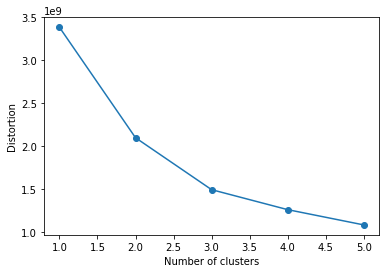

In [15]:
# クラスタ分析を実行(1~10クラスタまで一気に計算)
distortions = []

for num_clus in range(1,6):                # 1~10クラスタまで一気に計算(10クラスタで足りないと感じたら増やしてみてください)
    pred = KMeans(n_clusters=num_clus, random_state=0).fit(Data)  # クラスタリングの計算を実行
    distortions.append(pred.inertia_)   # km.fitするとkm.inertia_が得られる

plt.plot(range(1,6),distortions,marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

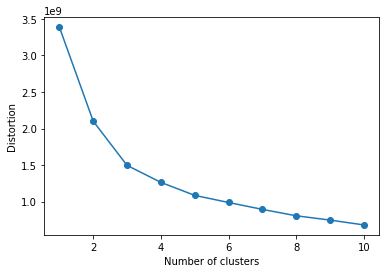

In [16]:
# クラスタ分析を実行(1~10クラスタまで一気に計算)
distortions = []

for num_clus in range(1,11):                # 1~10クラスタまで一気に計算(10クラスタで足りないと感じたら増やしてみてください)
    pred = KMeans(n_clusters=num_clus, random_state=0).fit(Data)  # クラスタリングの計算を実行
    distortions.append(pred.inertia_)   # km.fitするとkm.inertia_が得られる

plt.plot(range(1,11),distortions,marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

エルボー法を使っても3かな...\
もう少し細かく分かれるかなとは思っていたが、3が妥当なのかも